# Final Project Exploratory Data Analysis

Do your EDA in this notebook!

## Questions:
1. What major categories provide the lowest unemployment rate? (almost done with graph)
2. Which majors are most/least common? (done with graphs)
3. Is the difference between median and P75th similar between all major categories or is it all relative to pay scale? (it is not all relative to pay scale b/c economics and actruial science were in that list.. It's not similar between all majors either because some have a much higher gap b/t the two types of pay)
4. How many majors fall into each category?  (done with value counts)
5. Is the data actually accurate for analysis? (most is.. high amounts of health jobs in this study, less amount with computer and science majors)(a couple have unemployment rates of 0.00 so that isn't good data)

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
pwd

'/mnt/c/Users/Public/Documents/dev/course-materials/final-project-template'

In [3]:
major_data = pd.read_csv('/mnt/c/Users/Public/Documents/dev/course-materials/final-project-template/data/all-ages.csv')

In [4]:
major_data.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [5]:
major_data.tail()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
168,6211,HOSPITALITY MANAGEMENT,Business,200854,163393,122499,8862,0.051447,49000,33000,70000.0
169,6212,MANAGEMENT INFORMATION SYSTEMS AND STATISTICS,Business,156673,134478,118249,6186,0.043977,72000,50000,100000.0
170,6299,MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION,Business,102753,77471,61603,4308,0.052679,53000,36000,83000.0
171,6402,HISTORY,Humanities & Liberal Arts,712509,478416,354163,33725,0.065851,50000,35000,80000.0
172,6403,UNITED STATES HISTORY,Humanities & Liberal Arts,17746,11887,8204,943,0.073500,50000,39000,81000.0


In [6]:
major_data[['Unemployment_rate']].describe()

,Unemployment_rate
count,173.000000
mean,0.057355
std,0.019177
min,0.000000
25%,0.046261
50%,0.054719
75%,0.069043
max,0.156147


In [7]:
major_data.shape

(173, 11)

In [8]:
major_data.isnull().sum()

Major_code                       0
Major                            0
Major_category                   0
Total                            0
Employed                         0
Employed_full_time_year_round    0
Unemployed                       0
Unemployment_rate                0
Median                           0
P25th                            0
P75th                            0
dtype: int64

In [9]:
major_data['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Agriculture & Natural Resources        10
Physical Sciences                      10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

value_counts() shows how many different types of majors there are within a categroy

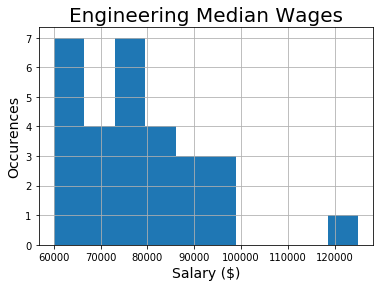

In [10]:
Engineer_wages = major_data[major_data['Major_category'] == 'Engineering']['Median'].hist()
plt.title('Engineering Median Wages', fontsize=20)
plt.ylabel('Occurences', fontsize=14,)
plt.xlabel('Salary ($)', fontsize=14);


Seen above: If you graduate with an engineering degree (minus chemical OR petroleum), expect to make 60,000-90,000 dollars for a medium salary.

In [11]:
major_data['Major_category'].unique()

array(['Agriculture & Natural Resources', 'Biology & Life Science',
       'Engineering', 'Humanities & Liberal Arts',
       'Communications & Journalism', 'Computers & Mathematics',
       'Industrial Arts & Consumer Services', 'Education',
       'Law & Public Policy', 'Interdisciplinary', 'Health',
       'Social Science', 'Physical Sciences', 'Psychology & Social Work',
       'Arts', 'Business'], dtype=object)

In [12]:
#major_data[(major_data['Major']) & (major_data['Unemployment_rate'] > 0.05)]

#pd.DataFrame(major_data[['Major','Unemployment_rate']])
#major_data[['Major','Unemployment_rate']]
major_data[(major_data['Unemployment_rate'] < 0.03)]

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
26,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,Education,4037,3113,2468,0,0.000000,58000,44750,79000.0
51,2411,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,6264,4120,3350,0,0.000000,85000,55000,125000.0
85,3607,PHARMACOLOGY,Biology & Life Science,5015,3481,2579,57,0.016111,60000,35000,105000.0
97,4005,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,7184,5874,5039,150,0.024900,92000,53000,136000.0
111,5008,MATERIALS SCIENCE,Engineering,7208,5866,4505,134,0.022333,75000,60000,100000.0
153,6107,NURSING,Health,1769892,1325711,947546,36503,0.026797,62000,48000,80000.0
155,6109,TREATMENT THERAPY PROFESSIONS,Health,252138,199174,128115,5378,0.026292,61000,40000,80000.0


In [13]:
major_data[(major_data['Unemployment_rate'] > 0.082)]

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
11,1401,ARCHITECTURE,Engineering,294692,216770,163020,20394,0.085991,63000,40400,93500.0
15,1903,MASS MEDIA,Communications & Journalism,211213,170474,125489,15431,0.083005,48000,32000,70000.0
17,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,62141,49609,37261,4609,0.085009,50000,34500,75000.0
19,2101,COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics,29317,22828,18747,2265,0.090264,60000,40000,85000.0
27,2303,SCHOOL STUDENT COUNSELING,Education,2396,1492,1093,169,0.101746,41000,33200,50000.0
77,3501,LIBRARY SCIENCE,Education,16193,7091,4330,743,0.094843,40000,30000,55000.0
93,3801,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services,4315,1650,1708,187,0.101796,64000,39750,90000.0
104,5001,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,4700,3400,2447,320,0.086022,80000,40000,106000.0
116,5202,CLINICAL PSYCHOLOGY,Psychology & Social Work,7638,5128,3297,587,0.102712,45000,26100,62000.0
118,5205,INDUSTRIAL AND ORGANIZATIONAL PSYCHOLOGY,Psychology & Social Work,17969,11878,8631,1084,0.083629,62000,40000,84000.0


In [14]:
major_data[(major_data['Major_category'] == 'Engineering') & (major_data['P75th'] > 120000.0)]

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
51,2411,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,6264,4120,3350,0,0.000000,85000,55000,125000.0
55,2415,METALLURGICAL ENGINEERING,Engineering,12818,6939,5462,326,0.044873,96000,65000,123000.0
56,2416,MINING AND MINERAL ENGINEERING,Engineering,10746,7416,6419,366,0.047032,92000,52000,124000.0
57,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,16094,10690,9226,449,0.040309,97000,60000,125000.0
58,2418,NUCLEAR ENGINEERING,Engineering,9826,7320,6474,527,0.067159,95000,65000,128000.0
59,2419,PETROLEUM ENGINEERING,Engineering,19631,14002,11636,617,0.042205,125000,75000,210000.0


In [15]:
major_data[major_data['Major'] == 'COMPUTER ENGINEERING']

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
47,2407,COMPUTER ENGINEERING,Engineering,154160,128742,111025,7456,0.054744,80000,60000,107000.0


In [16]:
pd.DataFrame(major_data[['Major', 'P75th']])

,Major,P75th
0,GENERAL AGRICULTURE,80000.0
1,AGRICULTURE PRODUCTION AND MANAGEMENT,80000.0
2,AGRICULTURAL ECONOMICS,98000.0
3,ANIMAL SCIENCES,72000.0
4,FOOD SCIENCE,90000.0
...,...,...
168,HOSPITALITY MANAGEMENT,70000.0
169,MANAGEMENT INFORMATION SYSTEMS AND STATISTICS,100000.0
170,MISCELLANEOUS BUSINESS & MEDICAL ADMINISTRATION,83000.0
171,HISTORY,80000.0


In [17]:
major_data[major_data['Major'] == 'Biology']

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th


 `Biology` was not a major in this dataset!

In [18]:
major_data['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Agriculture & Natural Resources        10
Physical Sciences                      10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

In [19]:
major_data[major_data['Major_category'] == 'Interdisciplinary']['Unemployment_rate'].mean()

0.077268968

#### Mean Unemployment Rates for Major Categories
1. Engineering:                           0.0506
2. Education:                             0.0468 
3. Humanities & Liberal Arts:             0.0694
4. Biology & Life Science:                0.0499
5. Business:                              0.0545
6. Health:                                0.0472 
7. Computers & Mathematics:               0.0594 
8. Physical Sciences:                     0.0545 
9. Agriculture & Natural Resources:       0.0396 
10. Social Science:                        0.0657 
11. Psychology & Social Work:              0.0779 
12. Arts:                                  0.0876 
13. Industrial Arts & Consumer Services:   0.0585 
14. Law & Public Policy:                   0.0679 
15. Communications & Journalism:           0.0691 
16. Interdisciplinary:                     0.0772     

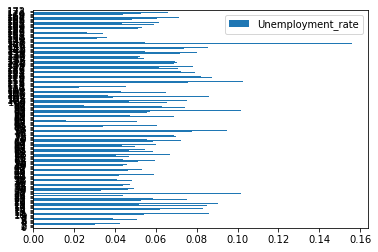

In [20]:
major_data[['Major_category','Unemployment_rate']].plot(kind='barh')

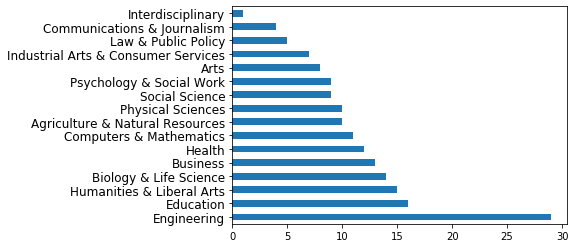

In [21]:
major_data['Major_category'].value_counts().plot(kind='barh')
plt.yticks(fontsize=12);

In [22]:
major_data['Major_category'].value_counts()[major_data['Unemployment_rate']].mean()

nan

In [23]:
maj_cats_val_counts = major_data['Major_category'].value_counts()
unemploy_rate_mean = major_data['Unemployment_rate'].mean()

In [24]:
major_data[['Major_category', 'Unemployment_rate']]

,Major_category,Unemployment_rate
0,Agriculture & Natural Resources,0.026147
1,Agriculture & Natural Resources,0.028636
2,Agriculture & Natural Resources,0.030248
3,Agriculture & Natural Resources,0.042679
4,Agriculture & Natural Resources,0.049188
...,...,...
168,Business,0.051447
169,Business,0.043977
170,Business,0.052679
171,Humanities & Liberal Arts,0.065851


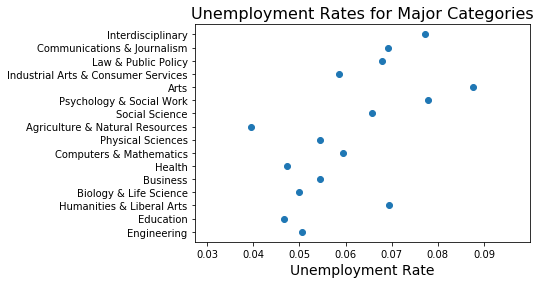

In [25]:
list_of_categories = ['Engineering', 'Education', 'Humanities & Liberal Arts', 
                'Biology & Life Science', 'Business', 'Health',
                'Computers & Mathematics', 'Physical Sciences', 
                'Agriculture & Natural Resources', 'Social Science',
                'Psychology & Social Work', 'Arts',                         
                'Industrial Arts & Consumer Services', 'Law & Public Policy',
                'Communications & Journalism',           
                'Interdisciplinary']

empty_list = []
for i in list_of_categories:
    val = major_data[major_data['Major_category'] == (i)]['Unemployment_rate'].mean()
    
    empty_list.append(val)
#print(empty_list)
plt.scatter(empty_list, list_of_categories), plt.title('Unemployment Rates for Major Categories', \
                                                 fontsize=16), plt.xlabel('Unemployment Rate', fontsize=14);

        
#     for val in empty_list:
#         plt.plot(list_of_cats)
        
    
    

In [26]:
mean_list = []
for i in list_of_categories:
    val = major_data[major_data['Major_category'] == (i)]['Unemployment_rate'].mean()
    mean_list.append(val)
pd.DataFrame(mean_list, list_of_categories)


,0
Engineering,0.050630
Education,0.046762
Humanities & Liberal Arts,0.069429
Biology & Life Science,0.049936
Business,0.054496
Health,0.047209
Computers & Mathematics,0.059437
Physical Sciences,0.054541
Agriculture & Natural Resources,0.039569
Social Science,0.065686


In [27]:
#major_data[['Major', 'Total']]
#major_data[(major_data['Major_category'] == 'Engineering') & (major_data['P75th'] > 120000.0)]
pd.DataFrame(major_data[(major_data['Total'] > 750000)]['Major'])


,Major
13,COMMUNICATIONS
20,COMPUTER SCIENCE
25,GENERAL EDUCATION
28,ELEMENTARY EDUCATION
73,ENGLISH LANGUAGE AND LITERATURE
78,BIOLOGY
114,PSYCHOLOGY
121,CRIMINAL JUSTICE AND FIRE PROTECTION
127,ECONOMICS
153,NURSING


In [28]:
pd.DataFrame(major_data[(major_data['Total'] < 7500)]['Major'])

,Major
6,SOIL SCIENCE
26,EDUCATIONAL ADMINISTRATION AND SUPERVISION
27,SCHOOL STUDENT COUNSELING
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING
83,GENETICS
85,PHARMACOLOGY
93,MILITARY TECHNOLOGIES
97,MATHEMATICS AND COMPUTER SCIENCE
98,COGNITIVE SCIENCE AND BIOPSYCHOLOGY
104,ASTRONOMY AND ASTROPHYSICS


In [29]:
#major_data[['Major_category']],major_data[(major_data['P75th'] - major_data['Median'] > 20000)]
#major_data[['P75th'] - ['Median'] < 20000]
df3 = major_data['Major']
df1 = major_data['P75th']
df2 = major_data['Median']

calc = (df1 - df2)
calc.head(5)

   

0    30000.0
1    26000.0
2    35000.0
3    26000.0
4    28000.0
dtype: float64

,Major,P75 - Median
59,PETROLEUM ENGINEERING,85000.0
85,PHARMACOLOGY,45000.0
97,MATHEMATICS AND COMPUTER SCIENCE,44000.0
127,ECONOMICS,41000.0
160,ACTUARIAL SCIENCE,43000.0


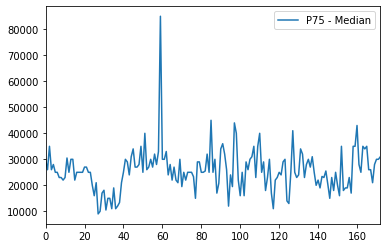

In [30]:
import numpy as np
p75_minus_med = major_data['P75 - Median'] = df1 - df2
major_data[['Major', 'P75 - Median']].plot()
major_data[['Major', 'P75 - Median']].iloc[pd.np.r_[59:60, 85:86, 97:98, 127:128, 160:161]]
# major_data[['Major', 'P75 - Median']][85:86]
# major_data[['Major', 'P75 - Median']][97:98]
# major_data[['Major', 'P75 - Median']][127:128]
# major_data[['Major', 'P75 - Median']][160:161]



Series.iloc is used for indexing by position using integers.
Numpy r_ allowed my to stack the slices within the same DataFrame, whereas I couldn't stack these five data points before.


Petroleum Engineering Median Pay = $125,000
*** 
Pharmacology= $60,000  
***
Mathematics and Computer Science = $92,000                                                 
***
Economics = $69,000                                                                      
***
Actuarial Science = $72,000


#### Median Pay
*** 
Petroleum Engineering = 125,000
***
Pharmacology = 60,000
***
Mathematics and Computer Science = 92,000
***
Economics = 69,000
***
Actuarial Science = 72,000

In [31]:
major_data[major_data['Major'] == 'ACTUARIAL SCIENCE']['Median']

160    72000
Name: Median, dtype: int64

In [33]:
major_data[major_data['Major'] == 'PSYCHOLOGY']

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,P75 - Median
114,5200,PSYCHOLOGY,Psychology & Social Work,1484075,1055854,736817,79066,0.069667,45000,31000,68000.0,23000.0
